In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split



In [3]:
df = pd.read_csv("Social_Network_Ads.csv")

In [5]:
#preprossing to fix dataset issues 

#convert "Gender" column to number, Male ->1 Female -> 0 
df["Gender"] = np.where(df["Gender"] == "Male", 1, 0)

#remove labels/answers and drop userID 
features = df.drop("Purchased", axis = 1).drop("User ID", axis = 1)
labels = df["Purchased"]

In [8]:
labels.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.10)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
pred_knn = knn.predict(x_test)

pred_knn

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [15]:
accuracy_score(y_test, pred_knn)

0.875

In [16]:
accuracy_score(y_train, knn.predict(x_train))

0.8694444444444445

In [18]:
k_val = []
train_acc = []
test_acc = []

for k in range(2, 75):
    k_val.append(k)
    
    #train model
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    
    #get training acc
    train_acc.append(accuracy_score(y_train, knn.predict(x_train)))
    
    #get test acc
    test_acc.append(accuracy_score(y_test, knn.predict(x_test)))

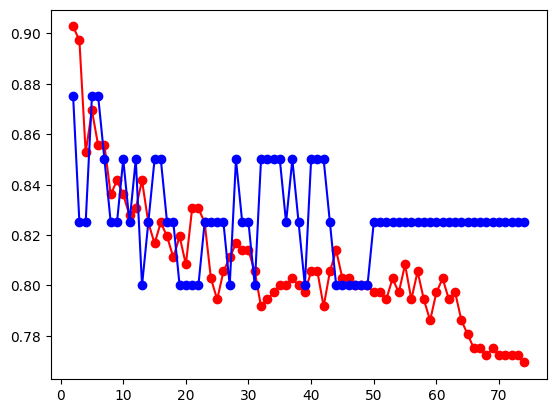

In [19]:
import matplotlib.pyplot as plt

plt.plot(k_val, train_acc, color = "red", marker = 'o')
plt.plot(k_val, test_acc, color = "blue", marker = 'o')

plt.show()

In [21]:
def avg_perf_scores(k):
    train_acc = []
    test_acc = []
    #run the experiment 10 times
    for i in range(0,10):
        #split data randomly into testing and training 
        X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.10)
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)

        #get the training error
        pred_knn_train = knn.predict(X_train)
        train_acc.append(accuracy_score(y_train, pred_knn_train))

        #get the testing error
        pred_knn_test = knn.predict(X_test)
        test_acc.append(accuracy_score(y_test, pred_knn_test))
    
    tst_avg = np.mean(np.array(test_acc))
    tst_std = np.std(np.array(test_acc))
    
    trn_avg = np.mean(np.array(train_acc))
    trn_std = np.std(np.array(train_acc))
    
    return [trn_avg, trn_std], [tst_avg, tst_std]

In [26]:
k_val = []
train_m = []
train_s = []

test_m = []
test_s = []

for k in range(2, 55):
    k_val.append(k)
    res = avg_perf_scores(k)
    train_m.append(res[0][0])
    train_s.append(res[0][1])

    test_m.append(res[1][0])
    test_s.append(res[1][1])

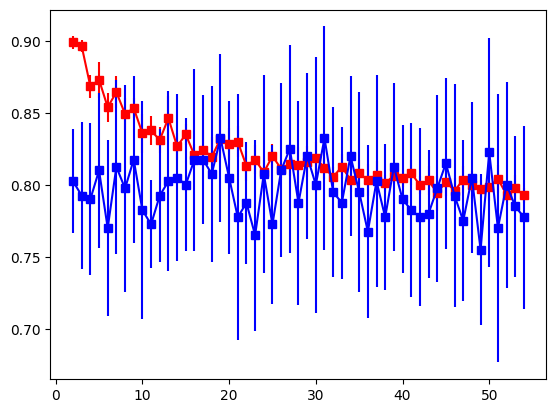

In [27]:
plt.errorbar(k_val, train_m, yerr=train_s, marker='s', color='red')
plt.errorbar(k_val, test_m, yerr=test_s, marker='s', color='blue')

plt.show()

In [5]:
df["Gender"] = np.where(df["Gender"] == "Male", 1, 0)

df = df.drop("User ID", axis = 1)
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,0,51,23000,1
397,0,50,20000,1
398,0,36,33000,0


In [6]:
from sklearn.decomposition import PCA

In [7]:
features = df.drop("Purchased", axis = 1)
labels = df["Purchased"]

In [8]:
reduced_feat = PCA(n_components=2).fit_transform(features)

In [9]:
reduced_feat

array([[-5.07425008e+04, -1.62332194e+01],
       [-4.97425001e+04, -2.80946249e-01],
       [-2.67425005e+04, -1.03786642e+01],
       [-1.27425005e+04, -1.00468404e+01],
       [ 6.25749910e+03, -1.89536509e+01],
       [-1.17425005e+04, -1.00945672e+01],
       [ 1.42574995e+04, -1.13354658e+01],
       [ 8.02574996e+04, -9.48543913e+00],
       [-3.67425006e+04, -1.09013955e+01],
       [-4.74250012e+03, -2.42865532e+00],
       [ 1.02574994e+04, -1.21445583e+01],
       [-1.77425005e+04, -1.08082060e+01],
       [ 1.62574991e+04, -1.84309195e+01],
       [-5.17425002e+04, -3.18549251e+00],
       [ 1.22574990e+04, -2.02400121e+01],
       [ 1.02574996e+04, -9.14455834e+00],
       [-4.47424995e+04,  1.14804194e+01],
       [-4.37424996e+04,  9.43269253e+00],
       [-4.17424996e+04,  1.03372388e+01],
       [-4.07424995e+04,  1.22895119e+01],
       [-4.77424996e+04,  9.62360000e+00],
       [-2.07424995e+04,  1.03349746e+01],
       [-2.87424995e+04,  1.17167895e+01],
       [-4.

In [10]:
import matplotlib.pyplot as plt



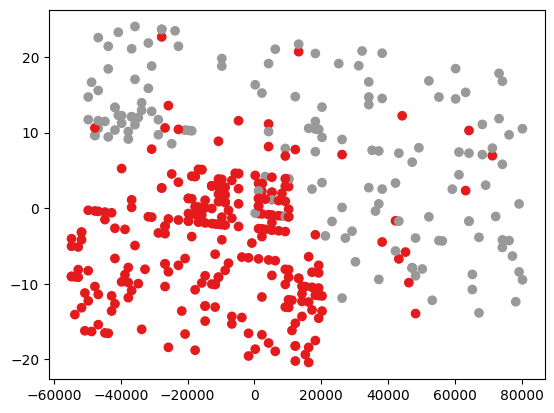

In [14]:
plt.scatter(reduced_feat[:,0], reduced_feat[:,1], c = labels, cmap = plt.cm.Set1)